<a href="https://colab.research.google.com/github/unverciftci/derin_ogrenme_notlari/blob/main/SwissRoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
X, R = datasets.make_swiss_roll(n_samples=1000, random_state=0)

In [8]:
R

array([ 9.8848344 , 11.45288996, 10.39329996,  9.84779199,  8.7052414 ,
       10.79979758,  8.83655129, 13.1171515 , 13.79469653,  8.32624016,
       12.17422167,  9.69710616, 10.06608284, 13.43593178,  5.38188806,
        5.53356328,  4.90294289, 12.55964615, 12.04634358, 12.9120603 ,
       13.93564956, 12.244281  ,  9.0617295 , 12.06870316,  5.82709918,
       10.74350252,  6.06346188, 13.61568377,  9.63069354,  8.62048569,
        7.20576688, 12.00936959,  9.01150458, 10.06975273,  4.88947868,
       10.5334664 , 10.48125526, 10.52685492, 13.60700507, 11.13839391,
        8.10067112,  8.83131811, 11.2874081 ,  5.28000068, 10.99651723,
       11.03300199,  6.69519791,  5.92749071,  7.68523115,  8.14028224,
       10.08636694,  8.84611086, 14.02759295,  5.67413866,  6.68100603,
        6.23269537, 10.86778993,  7.09960609,  9.10726448,  7.01604591,
        6.21064201,  5.75265018, 10.89814963,  6.01473261,  6.56513409,
        8.18754184, 12.45006788,  5.62754694, 12.60983368,  5.61

In [4]:
X

array([[ -8.85708287,  12.45048569,  -4.38885338],
       [  5.0569229 ,   0.21133761, -10.2760021 ],
       [ -5.88799247,   9.99235011,  -8.56459157],
       ...,
       [  7.43454008,  10.08226395,  11.33631801],
       [  5.72861159,  13.52114477,   3.78724932],
       [  1.09344646,  10.53723574, -11.04027772]])

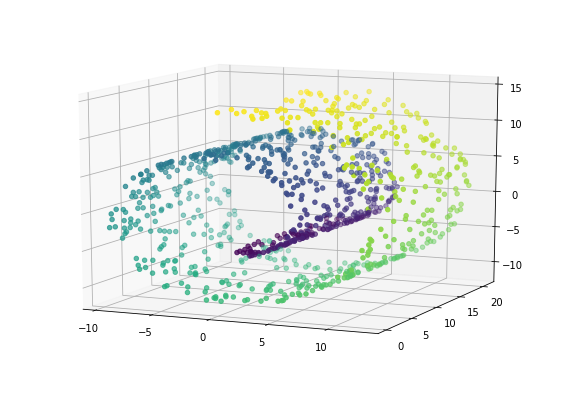

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.view_init(azim=-66, elev=12)
ax.scatter(X[:,0], X[:,1], X[:,2], c=R);

In [21]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization
import tensorflow as tf

 

In [13]:
X = (X - X.min()) / (X.max() - X.min())
X

array([[6.82174529e-02, 7.33875826e-01, 2.07807025e-01],
       [5.02897479e-01, 3.51519136e-01, 2.38897548e-02],
       [1.60973221e-01, 6.57082525e-01, 7.73550176e-02],
       ...,
       [5.77175348e-01, 6.59891475e-01, 6.99068709e-01],
       [5.23881346e-01, 7.67323715e-01, 4.63232284e-01],
       [3.79076627e-01, 6.74105006e-01, 1.34281857e-05]])

In [42]:
from keras import backend as K
def custom(x):
  return K.sin(x)

In [70]:
x = Input(shape=(3,))

e1 = Dense(units=32, activation='relu')(x)
e2 = Dense(units=10, activation='tanh')(e1)
e3 = BatchNormalization()(e2)
e4 = Dense(units=2, activation='tanh')(e3)

E = Model(x, e4)

z = Input(shape=(2,))

d1 = Dense(units=32, activation='sigmoid')(z)
d2 = Dense(units=10, activation='sigmoid')(d1)
d3 = BatchNormalization()(d2)
d4 = Dense(units=3, activation='sigmoid')(d3)
D = Model(z, d4)

e = E(x)
d = D(e)

A = Model(x, d)

A.compile(optimizer='sgd', loss='mse')

In [71]:
A.fit(X, X, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.0654
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 12/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 13/50
32/32 [==============================

TensorShape([1000, 2])

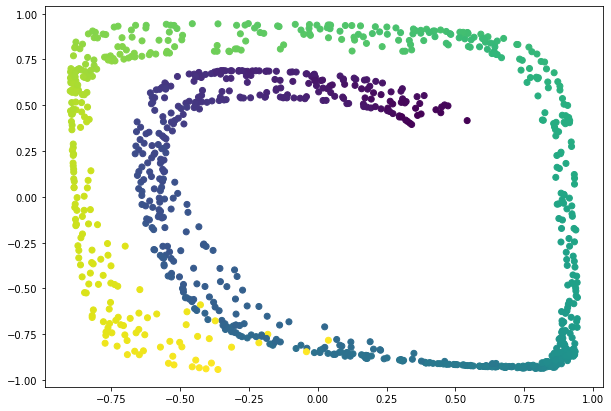

In [72]:
Z = E(X)

fig = plt.figure(figsize=(10,7))
plt.scatter(Z[:,0], Z[:,1], c=color)
Z.shape

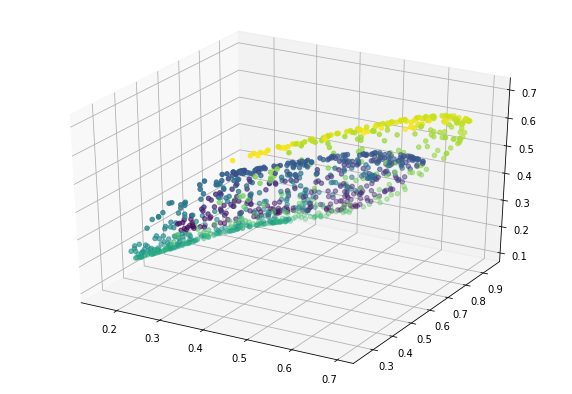

In [ ]:

Xp = A(X)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d");
ax.scatter(Xp[:,0], Xp[:,1], Xp[:,2], c=color);

In [ ]:
input_img = Input(shape=(3,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(3, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X, X,
                epochs=100,
                batch_size=256)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 75.6822
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 72.4375
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 72.0929
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 71.8597
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 71.5072
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 70.9361
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 70.0460
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 69.8468
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 69.8083
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 69.7804
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 69.6511
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 69.4954
Epoch 13/100
20/20 [=====